In [4]:
from dpm.models import LogisticRegression, BayesianLogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

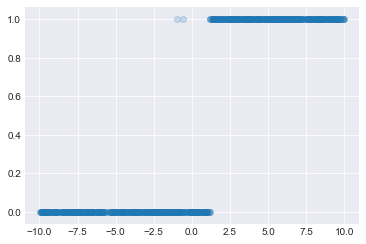

In [6]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 1, (N, 1))
y = torch.sigmoid(torch.tensor(y))
y = y.round().float()
plt.scatter(x[:, 2], y, alpha=0.2); plt.show()


In [40]:
model = LogisticRegression(input_dim=3)

In [41]:
[p.view(-1) for p in model.model.parameters()]

[tensor([0.5154, 0.5468, 0.4146], grad_fn=<ViewBackward>),
 tensor([0.2622], grad_fn=<ViewBackward>)]

In [42]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([0.5154, 0.5468, 0.4146, 0.2622], grad_fn=<CatBackward>)

In [43]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [44]:
[p.view(-1) for p in model.model.parameters()]

[tensor([ 6.8396,  3.1472, -7.3485], grad_fn=<ViewBackward>),
 tensor([-6.7828], grad_fn=<ViewBackward>)]

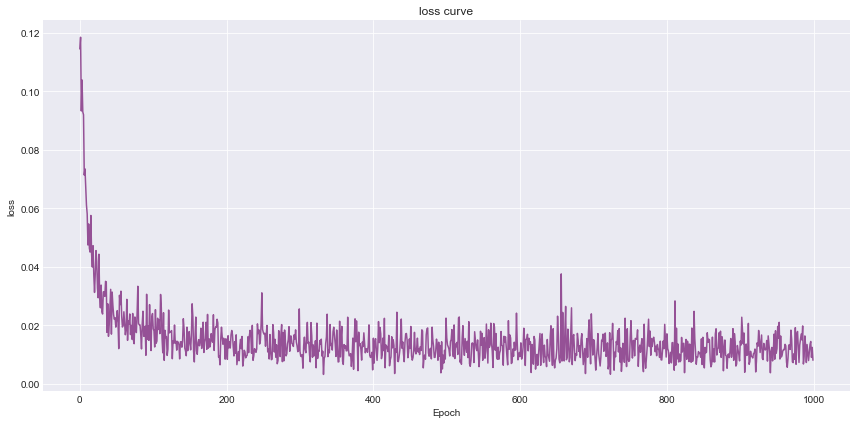

In [45]:
plot_stats(stats)

In [46]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 6.8396],
        [ 3.1472],
        [-7.3485],
        [-6.7828]], grad_fn=<ViewBackward>)

In [47]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -1.6482e-04,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -8.5689e-02,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -2.1792e-02,  0.0000e+00,
         0.0000e+00, -2.9141e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -1.9987e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -2.9330e-04,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -4.5877e-03,  0.0000e+00,  0.0000e+00, -2.0798e-03,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -5.9605e-08,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [48]:
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor(0.9920)

In [49]:
model = BayesianLogisticRegression(input_dim=3)
model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor(0.9010)